In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [15]:
data =pd.read_csv("heart_attack_russia_youth_vs_adult.csv")


# Heart_Attack is my target variable.

In [17]:
data.head()


,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1.0,50,Male,Rural,110.0,196.5,15.9,76.0,High,False,Moderate,False,False,8.0,False,False,False,Unhealthy,9.4,Unemployed,Low,Low,Primary,Married,Rural,False,5.0,2.3,5.0,False
1,2.0,40,Female,Urban,138.8,157.5,27.1,82.0,Moderate,False,NaN,False,True,5.0,False,True,False,Unhealthy,5.5,Employed,Low,Moderate,Higher,Married,Urban,False,1.0,5.0,4.0,False
2,3.0,26,Male,Rural,116.0,210.1,27.2,71.0,Moderate,False,Moderate,True,False,8.0,False,False,False,Unhealthy,8.8,Employed,Middle,High,Primary,Married,Urban,False,4.0,2.4,8.0,False
3,4.0,54,Female,Rural,133.5,170.5,26.0,74.0,Moderate,True,Moderate,False,True,5.0,False,False,False,Healthy,8.2,Student,Middle,Moderate,Higher,Married,Urban,False,2.0,2.7,6.0,True
4,5.0,19,Female,Urban,108.0,224.5,27.5,67.0,Low,False,NaN,False,True,1.0,False,False,False,Unhealthy,5.9,Employed,Middle,Low,Higher,Widowed,Urban,False,4.0,3.5,4.0,True


In [18]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49970 non-null  float64
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 49972 non-null  object 
 4   Blood_Pressure         49969 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             49909 non-null  float64
 8   Exercise_Level         49820 non-null  object 
 9   Smoking                49897 non-null  object 
 10  Alcohol_Consumption    24904 non-null  object 
 11  Diabetes               49897 non-null  object 
 12  Family_History         49897 non-null  object 
 13  Stress_Level           49886 non-null  float64
 14  Heart_Attack           49897 non-null  object 
 15  An

# Checking redundant columns i.e. ID

In [20]:
data.drop("ID",axis=1,inplace=True)

<Axes: xlabel='Heart_Attack'>

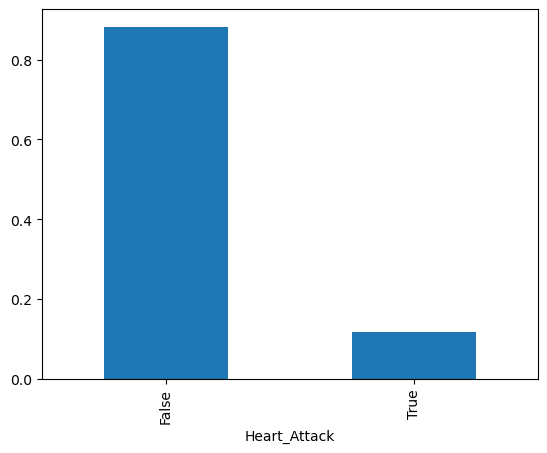

In [21]:
data["Heart_Attack"].value_counts(normalize=True).plot(kind="bar")

In [22]:
data.shape

(50000, 29)

In [23]:
data.head(1)

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,50,Male,Rural,110.0,196.5,15.9,76.0,High,False,Moderate,False,False,8.0,False,False,False,Unhealthy,9.4,Unemployed,Low,Low,Primary,Married,Rural,False,5.0,2.3,5.0,False


# Checking duplicate rows 

In [25]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [26]:
data[data.duplicated()]

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


# Checking null values 

In [28]:
data.shape

(50000, 29)

In [29]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000
Gender                    0.000
Region                    0.056
Blood_Pressure            0.062
Cholesterol               0.000
BMI                       0.000
Heart_Rate                0.182
Exercise_Level            0.360
Smoking                   0.206
Alcohol_Consumption      50.192
Diabetes                  0.206
Family_History            0.206
Stress_Level              0.228
Heart_Attack              0.206
Angina                    0.284
Heart_Disease_History     0.142
Diet                      0.142
Sleep_Hours               0.142
Occupation                0.276
Income_Level              0.142
Physical_Activity         0.140
Education_Level           0.140
Marital_Status            0.190
Urban_Rural               0.188
Medication                0.138
Health_Awareness          0.138
Daily_Water_Intake        0.138
Mental_Health             0.138
Obesity                   0.002
dtype: float64

In [30]:
data.Heart_Attack.unique()

array([False, True, nan], dtype=object)

In [31]:
d = data[data["Heart_Attack"].isnull()==True].index

In [32]:
d

Index([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
       ...
       267, 289, 290, 291, 292, 293, 294, 295, 296, 297],
      dtype='int64', length=103)

In [33]:
data.drop(d,inplace=True)

# Filling null values 

In [35]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000000
Gender                    0.000000
Region                    0.056116
Blood_Pressure            0.000000
Cholesterol               0.000000
BMI                       0.000000
Heart_Rate                0.000000
Exercise_Level            0.154318
Smoking                   0.000000
Alcohol_Consumption      50.089184
Diabetes                  0.000000
Family_History            0.000000
Stress_Level              0.022045
Heart_Attack              0.000000
Angina                    0.090186
Heart_Disease_History     0.002004
Diet                      0.002004
Sleep_Hours               0.002004
Occupation                0.128264
Income_Level              0.002004
Physical_Activity         0.002004
Education_Level           0.002004
Marital_Status            0.044091
Urban_Rural               0.044091
Medication                0.002004
Health_Awareness          0.002004
Daily_Water_Intake        0.002004
Mental_Health             0.002004
Obesity             

In [36]:
for i in data.select_dtypes(include="object"):
    data[i].fillna(data[i].mode()[0],inplace=True)

In [37]:
data.Alcohol_Consumption.mode()[0]

'Moderate'

In [38]:
for i in data.select_dtypes(exclude="object"):
    data[i].fillna(data[i].mean(),inplace=True)

In [39]:
data.isnull().sum()/data.shape[0]*100

Age                      0.0
Gender                   0.0
Region                   0.0
Blood_Pressure           0.0
Cholesterol              0.0
BMI                      0.0
Heart_Rate               0.0
Exercise_Level           0.0
Smoking                  0.0
Alcohol_Consumption      0.0
Diabetes                 0.0
Family_History           0.0
Stress_Level             0.0
Heart_Attack             0.0
Angina                   0.0
Heart_Disease_History    0.0
Diet                     0.0
Sleep_Hours              0.0
Occupation               0.0
Income_Level             0.0
Physical_Activity        0.0
Education_Level          0.0
Marital_Status           0.0
Urban_Rural              0.0
Medication               0.0
Health_Awareness         0.0
Daily_Water_Intake       0.0
Mental_Health            0.0
Obesity                  0.0
dtype: float64

In [40]:
data.Heart_Attack = data["Heart_Attack"].astype(np.number)

C:\Users\jhaab\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [41]:
x=data.drop("Heart_Attack",axis=1)
y = data.Heart_Attack

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)

# Outlier treatment 

In [44]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

<Axes: xlabel='Heart_Attack'>

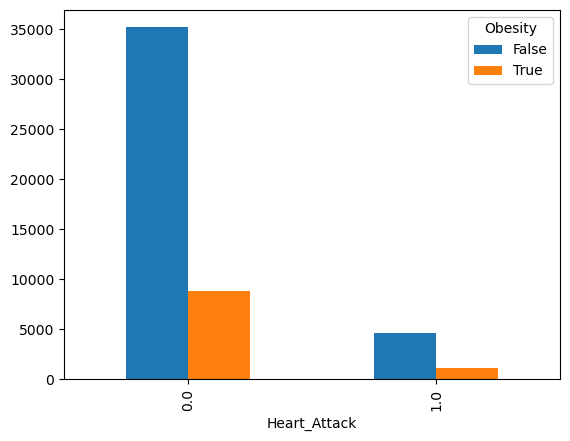

In [45]:
pd.crosstab(data["Heart_Attack"],columns=data["Obesity"]).plot(kind="bar")

Age


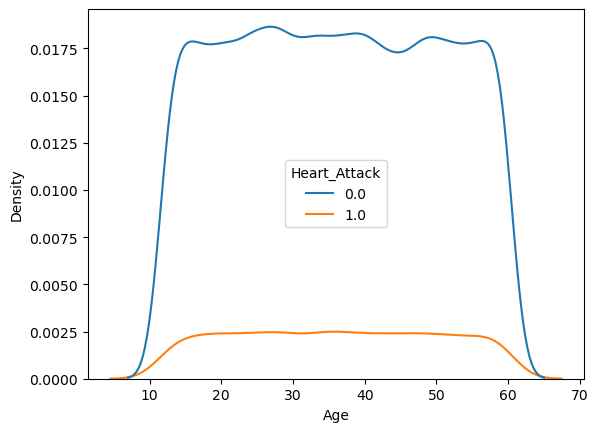

Blood_Pressure


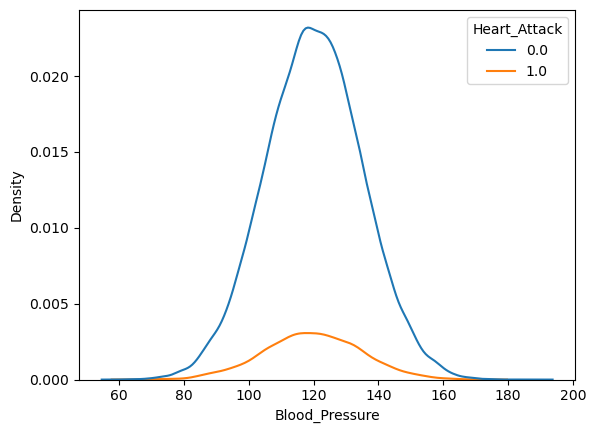

Cholesterol


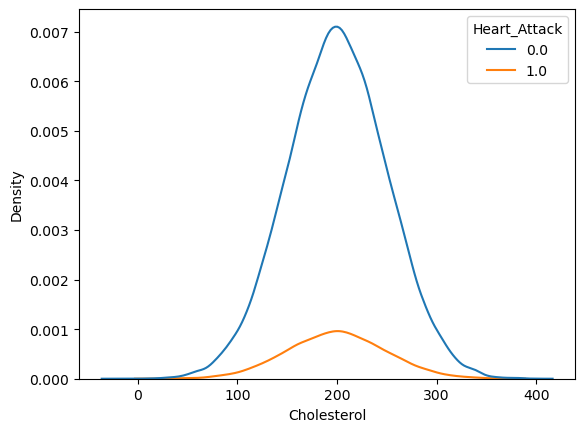

BMI


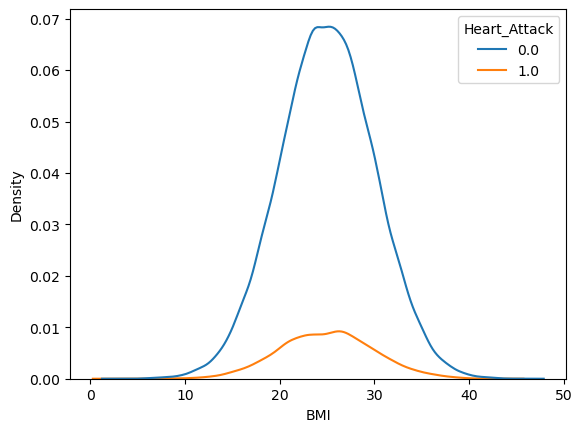

Heart_Rate


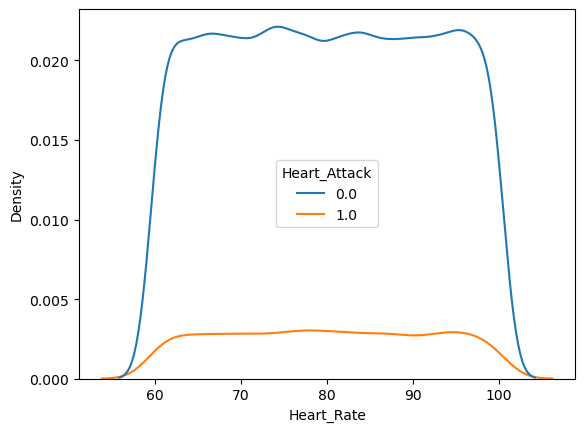

Stress_Level


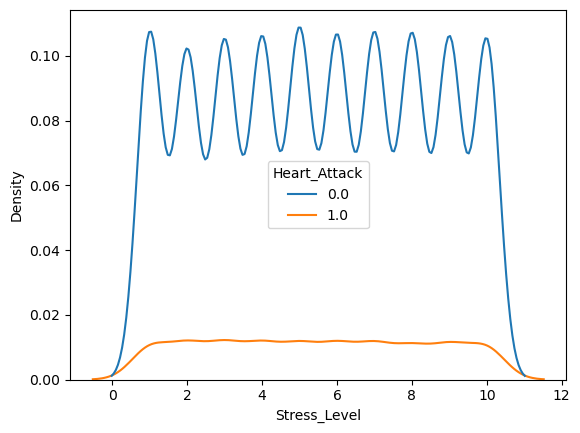

Heart_Attack


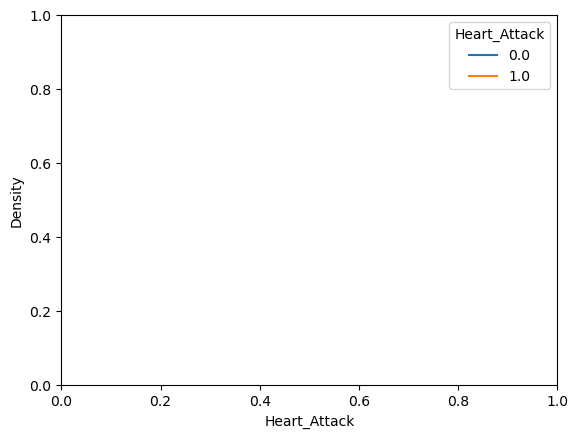

Angina


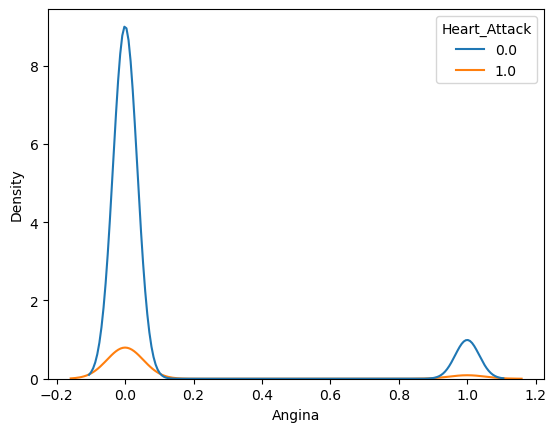

Heart_Disease_History


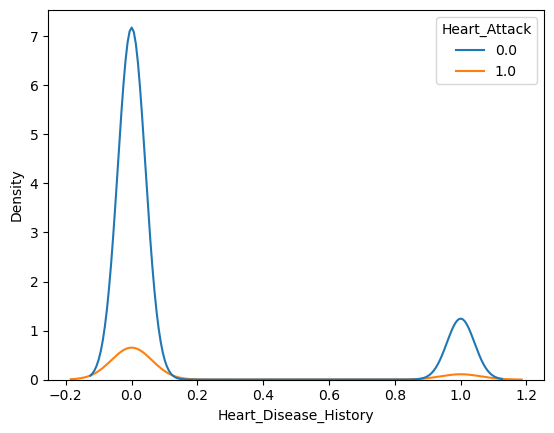

Sleep_Hours


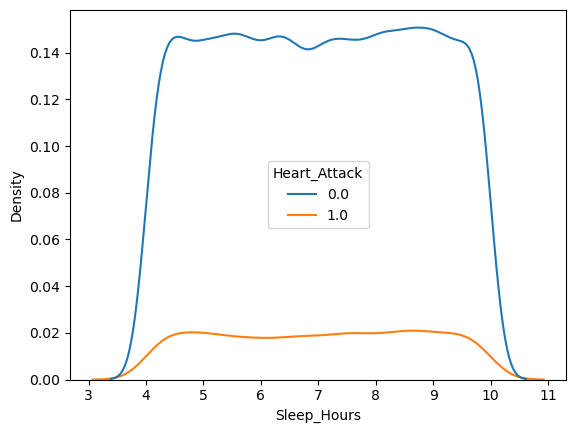

Medication


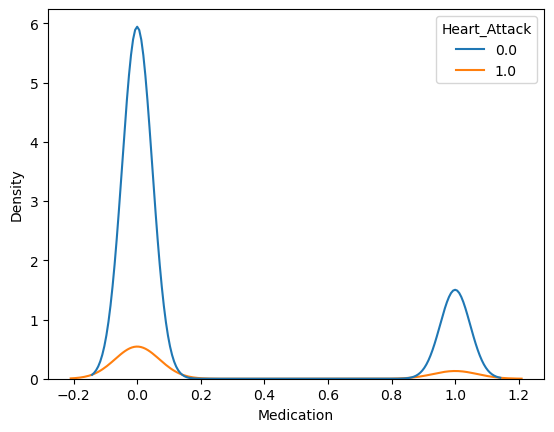

Health_Awareness


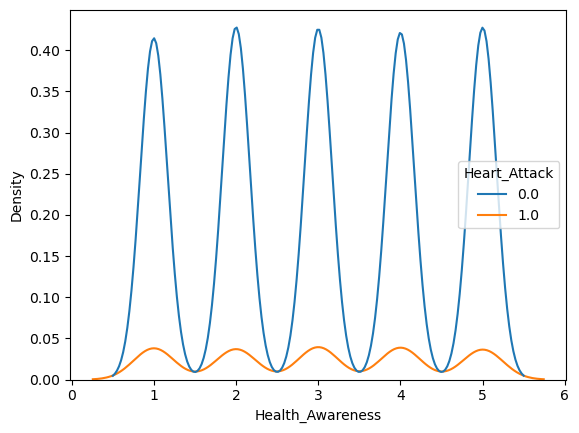

Daily_Water_Intake


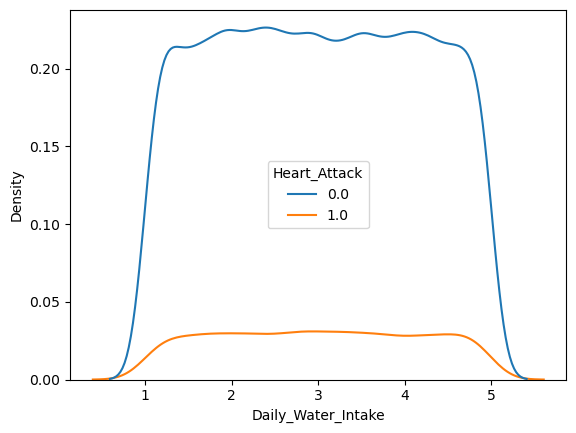

Mental_Health


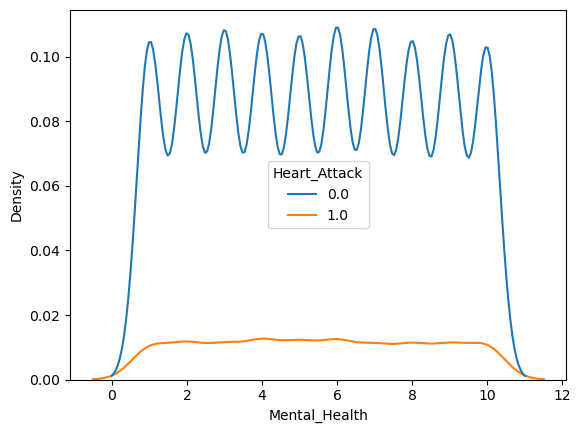

In [46]:
for i in data.select_dtypes(exclude="object"):
    print(i)
    sns.kdeplot(x=data[i],hue=data["Heart_Attack"])
    plt.show()

In [47]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Exercise_Level
['High' 'Low' 'Moderate']
Smoking
[False True]
Alcohol_Consumption
['Moderate' 'Heavy']
Diabetes
[False True]
Family_History
[False True]
Diet
['Healthy' 'Unhealthy' 'Mixed']
Occupation
['Student' 'Retired' 'Unemployed' 'Employed']
Income_Level
['Middle' 'Low' 'High']
Physical_Activity
['Moderate' 'High' 'Low']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Married' 'Single' 'Widowed' 'Divorced']
Urban_Rural
['Rural' 'Urban']
Obesity
[False True]


## excersie level , alochol consuption , income level , physical activity ,diet 
## education level --- has ordinal data 

In [49]:
ordrinal_data = ["Physical_Activity","Income_Level","Exercise_Level"]

In [50]:
for i in ordrinal_data:
    xtest[i]=xtest[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    xtrain[i]=xtrain[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    

In [51]:
for i in ordrinal_data:
    print(i,xtrain[i].unique(),xtest[i].unique())

Physical_Activity [2 3 1] [3 1 2]
Income_Level [2 1 3] [2 1 3]
Exercise_Level [3 1 2] [3 2 1]


In [52]:
xtest["Diet"]=xtest["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"]=xtrain["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"].unique(),xtest["Diet"].unique()    

(array([3, 1, 2], dtype=int64), array([1, 2, 3], dtype=int64))

In [53]:
xtest["Alcohol_Consumption"]=xtest["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else  2)
xtrain["Alcohol_Consumption"]=xtrain["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else   2)
xtrain["Alcohol_Consumption"].unique(),xtest["Alcohol_Consumption"].unique()    

(array([2, 3], dtype=int64), array([2, 3], dtype=int64))

In [54]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Smoking
[False True]
Diabetes
[False True]
Family_History
[False True]
Occupation
['Student' 'Retired' 'Unemployed' 'Employed']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Married' 'Single' 'Widowed' 'Divorced']
Urban_Rural
['Rural' 'Urban']
Obesity
[False True]


In [55]:
nomial_1= ["Obesity","Smoking","Diabetes","Family_History","Angina","Heart_Disease_History","Medication"]

In [56]:
for i in nomial_1:
    xtrain[i]=xtrain[i].astype(np.int64)
    xtest[i]=xtest[i].astype(np.int64)
    print(i, xtrain[i].unique(),xtest[i].unique())

Obesity [0 1] [0 1]
Smoking [0 1] [0 1]
Diabetes [0 1] [0 1]
Family_History [0 1] [1 0]
Angina [0 1] [0 1]
Heart_Disease_History [0 1] [1 0]
Medication [0 1] [0 1]


In [57]:
Onehot_dummy=[]

In [58]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())
    Onehot_dummy.append(i)

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Occupation
['Student' 'Retired' 'Unemployed' 'Employed']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Married' 'Single' 'Widowed' 'Divorced']
Urban_Rural
['Rural' 'Urban']


In [59]:
Onehot_dummy.pop()

'Urban_Rural'

In [60]:
Onehot_dummy

['Gender', 'Region', 'Occupation', 'Education_Level', 'Marital_Status']

In [61]:
for i in Onehot_dummy:
    xtrain = pd.concat([xtrain,pd.get_dummies(xtrain[i]).astype(np.int64)],axis=1)
    xtrain.drop(i,axis=1,inplace=True)
    xtest = pd.concat([xtest,pd.get_dummies(xtest[i]).astype(np.int64)],axis=1)
    xtest.drop(i,axis=1,inplace=True)
    print(xtrain.shape,xtest.shape)

(39917, 30) (9980, 30)
(39917, 32) (9980, 32)
(39917, 35) (9980, 35)
(39917, 37) (9980, 37)
(39917, 40) (9980, 40)


In [62]:
xtrain

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Angina,Heart_Disease_History,Diet,Sleep_Hours,Income_Level,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity,Female,Male,Other,Rural,Suburban,Urban,Employed,Retired,Student,Unemployed,Higher,Primary,Secondary,Divorced,Married,Single,Widowed
14674,35,138.5,210.5,25.2,62.0,3,0,2,0,0,10.0,0,0,3,6.5,2,2,Rural,0,5.0,3.5,8.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
27505,46,133.4,158.4,29.1,74.0,1,1,2,0,0,7.0,0,0,1,4.5,2,2,Rural,0,1.0,4.2,8.0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
12911,58,101.8,181.8,29.8,65.0,1,0,2,1,0,8.0,0,0,1,9.2,1,2,Urban,0,5.0,4.4,1.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
9921,47,116.0,168.3,27.9,84.0,1,0,2,0,0,2.0,0,0,1,7.6,1,3,Rural,0,1.0,3.2,2.0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
9711,40,119.5,236.5,26.4,84.0,2,0,2,0,0,3.0,1,0,1,4.6,2,3,Urban,0,3.0,3.5,6.0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22363,24,116.6,262.1,21.4,71.0,1,1,2,0,0,3.0,0,0,2,5.9,1,2,Urban,0,4.0,3.6,2.0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
33737,34,119.6,250.9,27.9,77.0,2,1,2,1,0,6.0,0,0,3,9.3,2,3,Urban,0,1.0,4.0,9.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
32945,32,97.1,154.0,23.6,73.0,2,0,2,0,1,2.0,0,0,2,4.3,1,3,Urban,0,2.0,4.5,7.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
47383,46,110.5,163.5,25.0,81.0,1,0,2,0,0,6.0,0,0,3,4.4,2,2,Rural,0,3.0,2.1,6.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [63]:
xtest["Urban_Rural"]=xtest["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"]=xtrain["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"].unique(),xtest["Urban_Rural"].unique()    

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [64]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39917 entries, 14674 to 33209
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    39917 non-null  int64  
 1   Blood_Pressure         39917 non-null  float64
 2   Cholesterol            39917 non-null  float64
 3   BMI                    39917 non-null  float64
 4   Heart_Rate             39917 non-null  float64
 5   Exercise_Level         39917 non-null  int64  
 6   Smoking                39917 non-null  int64  
 7   Alcohol_Consumption    39917 non-null  int64  
 8   Diabetes               39917 non-null  int64  
 9   Family_History         39917 non-null  int64  
 10  Stress_Level           39917 non-null  float64
 11  Angina                 39917 non-null  int64  
 12  Heart_Disease_History  39917 non-null  int64  
 13  Diet                   39917 non-null  int64  
 14  Sleep_Hours            39917 non-null  float64
 15  Inc

In [65]:
xtrain_c = sm.add_constant(xtrain)
xtest_c = sm.add_constant(xtest)

In [66]:
lr = sm.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.359735
         Iterations 10


In [67]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Heart_Attack   No. Observations:                39917
Model:                          Logit   Df Residuals:                    39881
Method:                           MLE   Df Model:                           35
Date:                Mon, 24 Mar 2025   Pseudo R-squ.:                0.001097
Time:                        14:21:17   Log-Likelihood:                -14360.
converged:                       True   LL-Null:                       -14375.
Covariance Type:            nonrobust   LLR p-value:                    0.6357
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7759        nan        nan        nan         nan         nan
Age                   -5.079e-05      0.001     -0.046      0.963      -0.002       0.002
Blood_Pressure           -0.0024      0.001     -2.244      0.025      -0.004      -0.000
Cholesterol              -0.0003      0.000     -0.811      0.418      -0.001       0.000
BMI                       0.0017      0.003      0.556      0.578      -0.004       0.008
Heart_Rate               -0.0005      0.001     -0.382      0.702      -0.003       0.002
Exercise_Level           -0.0034      0.022     -0.151      0.880      -0.047       0.040
Smoking                   0.0808      0.034      2.405      0.016       0.015       0.147
Alcohol_Consumption       0.0235      0.052      0.452      0.651      -0.078       0.125
Diabetes                 -0.0637      0.044     -1.433      0.152      -0.151       0.023
Family_History            0.0142      0.032      0.446      0.656      -0.048       0.076
Stress_Level             -0.0058      0.005     -1.073      0.283      -0.017       0.005
Angina                    0.0036      0.052      0.069      0.945      -0.098       0.106
Heart_Disease_History    -0.0526      0.045     -1.179      0.238      -0.140       0.035
Diet                      0.0170      0.019      0.901      0.368      -0.020       0.054
Sleep_Hours               0.0038      0.009      0.419      0.675      -0.014       0.021
Income_Level              0.0175      0.021      0.842      0.400      -0.023       0.058
Physical_Activity         0.0273      0.022      1.231      0.218      -0.016       0.071
Urban_Rural               0.0358      0.032      1.120      0.263      -0.027       0.098
Medication               -0.0501      0.039     -1.274      0.203      -0.127       0.027
Health_Awareness         -0.0028      0.011     -0.257      0.797      -0.025       0.019
Daily_Water_Intake        0.0060      0.014      0.439      0.661      -0.021       0.033
Mental_Health             0.0017      0.005      0.310      0.757      -0.009       0.012
Obesity                   0.0100      0.039      0.258      0.797      -0.066       0.086
Female                   -0.1945        nan        nan        nan         nan         nan
Male                     -0.2119        nan        nan        nan         nan         nan
Other                    -0.3695        nan        nan        nan         nan         nan
Rural                    -0.2658        nan        nan        nan         nan         nan
Suburban                 -0.2309        nan        nan        nan         nan         nan
Urban                    -0.2791        nan        nan        nan         nan         nan
Employed                 -0.1892        nan        nan        nan         nan         nan
Retired                  -0.2262        nan        nan        nan         nan         nan
Student                  -0.1572        nan        nan        nan         nan         nan
U

In [68]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [69]:
lr_test= [1 if x>0.5 else 0 for x in lr.predict(xtest_c)]

In [70]:
print(classification_report(ytest,lr_test))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8770
         1.0       0.00      0.00      0.00      1210

    accuracy                           0.88      9980
   macro avg       0.44      0.50      0.47      9980
weighted avg       0.77      0.88      0.82      9980



In [71]:
s=StandardScaler()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

In [73]:
for i in xtrain.columns:
    xtrain[i]=s.fit_transform(xtrain[[i]])
    xtest[i]=s.transform(xtest[[i]])

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [75]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

  File "C:\Users\jhaab\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jhaab\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jhaab\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jhaab\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Text(0.5, 23.52222222222222, 'predicted  values ')

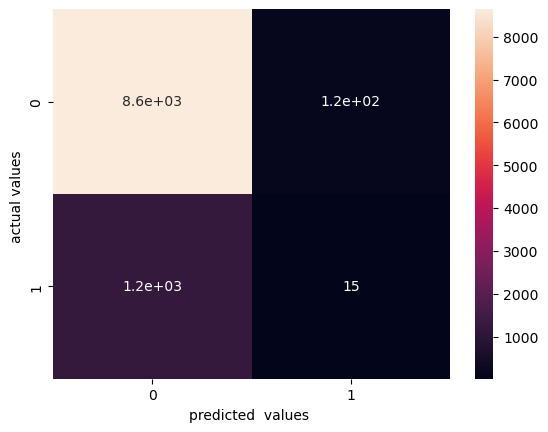

In [76]:
sns.heatmap(confusion_matrix(ytest,knn_model.predict(xtest)),annot=True)
plt.ylabel("actual values ")
plt.xlabel("predicted  values ")

# To find optimal value of K in KNN using cross val

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [79]:
n = [i for i in range(1,21,2)]
cross_val=[]

In [80]:
n

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [81]:
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    cross_val.append(np.mean(cross_val_score(estimator=knn,X=xtrain,y=ytrain,cv=5,n_jobs=-1)))

In [82]:
cross_val

[0.793646942513362,
 0.8536463977686048,
 0.872961424540174,
 0.8798256258226085,
 0.8819800881984439,
 0.8828068105395307,
 0.883107443121242,
 0.8833078627504287,
 0.8833329159885599,
 0.8833830193268912]

In [83]:
max(cross_val)

0.8833830193268912

In [84]:
np.argmax(cross_val)

9

In [85]:
n[np.argmax(cross_val)]

19

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
knn_model1 = KNeighborsClassifier(n_neighbors=19)

In [88]:
knn_model1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=19)

Text(0.5, 23.52222222222222, 'predicted value')

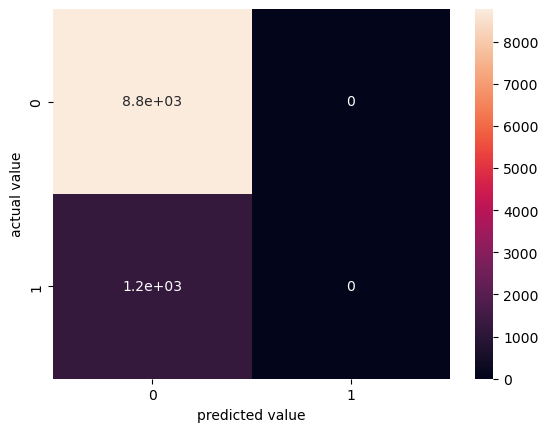

In [89]:
sns.heatmap(confusion_matrix(ytest,knn_model1.predict(xtest)),annot=True)
plt.ylabel("actual value")
plt.xlabel("predicted value")

In [90]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [91]:
dt = DecisionTreeClassifier(max_depth=3)

In [92]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [93]:
print(classification_report(ytrain,dt.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     35262
         1.0       0.67      0.00      0.00      4655

    accuracy                           0.88     39917
   macro avg       0.78      0.50      0.47     39917
weighted avg       0.86      0.88      0.83     39917



In [94]:
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8770
         1.0       0.00      0.00      0.00      1210

    accuracy                           0.88      9980
   macro avg       0.44      0.50      0.47      9980
weighted avg       0.77      0.88      0.82      9980



[Text(0.5, 0.875, 'Blood_Pressure <= -1.841\ngini = 0.206\nsamples = 39917\nvalue = [35262, 4655]'),
 Text(0.25, 0.625, 'Unemployed <= 0.768\ngini = 0.242\nsamples = 1339\nvalue = [1150, 189]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Daily_Water_Intake <= 1.353\ngini = 0.226\nsamples = 1088\nvalue = [947, 141]'),
 Text(0.0625, 0.125, 'gini = 0.241\nsamples = 957\nvalue = [823, 134]'),
 Text(0.1875, 0.125, 'gini = 0.101\nsamples = 131\nvalue = [124, 7]'),
 Text(0.375, 0.375, 'Smoking <= 0.431\ngini = 0.309\nsamples = 251\nvalue = [203, 48]'),
 Text(0.3125, 0.125, 'gini = 0.257\nsamples = 172\nvalue = [146, 26]'),
 Text(0.4375, 0.125, 'gini = 0.402\nsamples = 79\nvalue = [57, 22]'),
 Text(0.75, 0.625, 'BMI <= -2.0\ngini = 0.205\nsamples = 38578\nvalue = [34112, 4466]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Cholesterol <= -2.653\ngini = 0.162\nsamples = 899\nvalue = [819, 80]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6875, 0.1

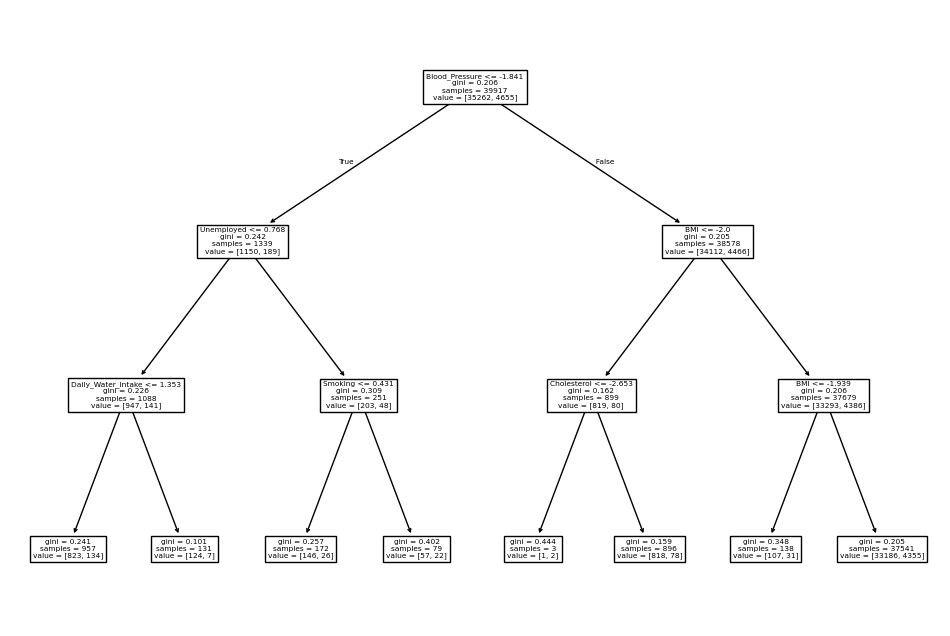

In [95]:
plt.figure(figsize=[12,8])
plot_tree(dt,feature_names=xtrain.columns)

In [96]:
from sklearn.model_selection import  GridSearchCV

In [97]:
params = {

    "max_depth":[i for i in range(1,5)],
    "min_samples_split":[i for i in range(1,5)],
    "min_samples_leaf":[i for i in range(1,5)]}

In [98]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=params,cv=5,n_jobs=-1,
                    scoring="precision")

In [99]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4]},
             scoring='precision')

In [100]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [101]:
dt2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf= 1, min_samples_split=2)

In [102]:
dt2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [103]:
Features_importance=pd.DataFrame({"Feature":xtrain.columns,"Importance":dt2.feature_importances_})
Features_importance.sort_values(by="Importance",ascending=False)

,Feature,Importance
14,Sleep_Hours,0.244106
3,BMI,0.233826
1,Blood_Pressure,0.163225
2,Cholesterol,0.078103
6,Smoking,0.068231
20,Daily_Water_Intake,0.067169
32,Unemployed,0.060250
38,Single,0.051836
0,Age,0.033255
9,Family_History,0.000000


In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
gb_model=GaussianNB()

In [106]:
gb_model.fit(xtrain,ytrain)

GaussianNB()

In [107]:
print(classification_report(ytrain,gb_model.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     35262
         1.0       0.00      0.00      0.00      4655

    accuracy                           0.88     39917
   macro avg       0.44      0.50      0.47     39917
weighted avg       0.78      0.88      0.83     39917



In [108]:
from sklearn.svm import SVC

In [109]:
print(classification_report(ytest,gb_model.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8770
         1.0       0.00      0.00      0.00      1210

    accuracy                           0.88      9980
   macro avg       0.44      0.50      0.47      9980
weighted avg       0.77      0.88      0.82      9980



Text(0.5, 23.52222222222222, 'predicted value')

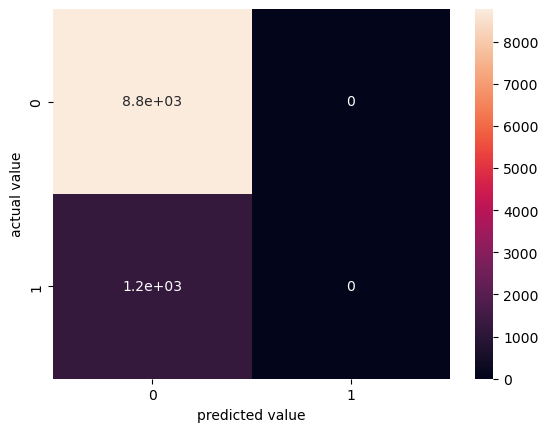

In [110]:
sns.heatmap(confusion_matrix(ytest,gb_model.predict(xtest)),annot=True)
plt.ylabel("actual value")
plt.xlabel("predicted value")

In [111]:
svc_model=SVC()

In [112]:
svc_model.fit(xtrain,ytrain)

SVC()

In [113]:
print(classification_report(ytest,svc_model.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8770
         1.0       0.00      0.00      0.00      1210

    accuracy                           0.88      9980
   macro avg       0.44      0.50      0.47      9980
weighted avg       0.77      0.88      0.82      9980



In [114]:
print(classification_report(ytrain,svc_model.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     35262
         1.0       0.00      0.00      0.00      4655

    accuracy                           0.88     39917
   macro avg       0.44      0.50      0.47     39917
weighted avg       0.78      0.88      0.83     39917



Text(0.5, 23.52222222222222, 'predicted value')

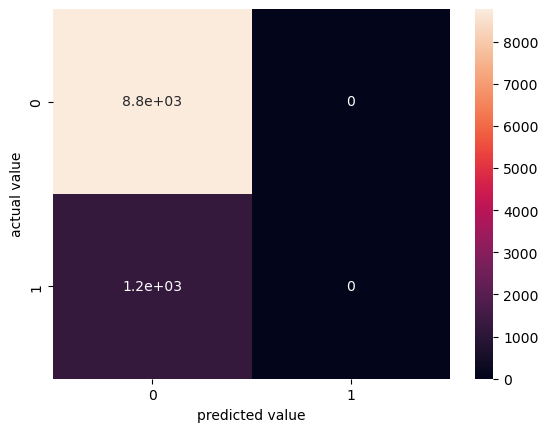

In [115]:
sns.heatmap(confusion_matrix(ytest,svc_model.predict(xtest)),annot=True)
plt.ylabel("actual value")
plt.xlabel("predicted value")

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf=RandomForestClassifier()

In [118]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [119]:
param_grid2={"n_estimators":[i for i in range(100,200)],
    "max_depth":[i for i in range(1,5)],
    "min_samples_split":[i for i in range(2,7)],
    "min_samples_leaf":[i for i in range(2,7)]
            }

In [120]:
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8770
         1.0       0.00      0.00      0.00      1210

    accuracy                           0.88      9980
   macro avg       0.44      0.50      0.47      9980
weighted avg       0.77      0.88      0.82      9980



In [121]:
print(classification_report(ytrain,rf.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35262
         1.0       1.00      1.00      1.00      4655

    accuracy                           1.00     39917
   macro avg       1.00      1.00      1.00     39917
weighted avg       1.00      1.00      1.00     39917



Text(0.5, 23.52222222222222, 'predicted value')

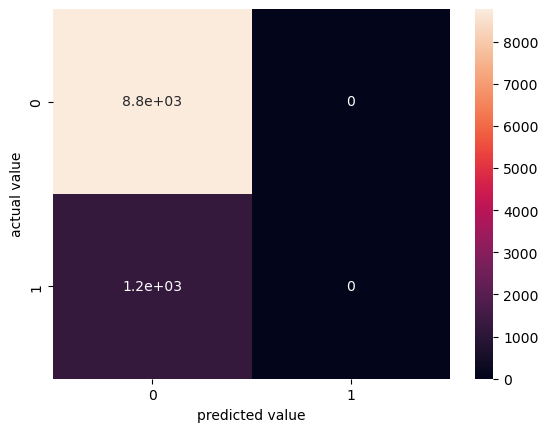

In [122]:
sns.heatmap(confusion_matrix(ytest,rf.predict(xtest)),annot=True)
plt.ylabel("actual value")
plt.xlabel("predicted value")

In [123]:
Features_importance=pd.DataFrame({"Feature":xtrain.columns,"Importance":rf.feature_importances_})
Features_importance.sort_values(by="Importance",ascending=False)

,Feature,Importance
2,Cholesterol,0.088741
1,Blood_Pressure,0.087519
3,BMI,0.083056
14,Sleep_Hours,0.073997
0,Age,0.070405
20,Daily_Water_Intake,0.069520
4,Heart_Rate,0.069404
10,Stress_Level,0.046189
21,Mental_Health,0.045221
19,Health_Awareness,0.031590


MAKE model using Post PRUNING 

In [125]:
dt_post=DecisionTreeClassifier(random_state=24)

In [126]:
path=dt_post.cost_complexity_pruning_path(xtrain,ytrain)